In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense

In [3]:
num_words=10000
(xt,yt),(xts,yts)=imdb.load_data(num_words=num_words)
print("Training samples: ",len(xt))
print("Testing samples: ",len(xts))

Training samples:  25000
Testing samples:  25000


In [8]:
max_len=200
xt=sequence.pad_sequences(xt,maxlen=max_len)
xts=sequence.pad_sequences(xts,maxlen=max_len)

In [9]:
model=Sequential()
model.add(Embedding(input_dim=num_words,output_dim=128,input_length=max_len))
model.add(SimpleRNN(128,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

c:\Users\midhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
history=model.fit(xt,yt,epochs=5,batch_size=64,validation_data=(xts,yts))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - accuracy: 0.6293 - loss: 0.6240 - val_accuracy: 0.7050 - val_loss: 0.5594
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.7303 - loss: 0.5344 - val_accuracy: 0.6335 - val_loss: 0.6295
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.7141 - loss: 0.5564 - val_accuracy: 0.6838 - val_loss: 0.5973
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.8264 - loss: 0.3929 - val_accuracy: 0.7563 - val_loss: 0.4992
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.6892 - loss: 0.5868 - val_accuracy: 0.6424 - val_loss: 0.6224


In [14]:
test_loss,test_accuracy=model.evaluate(xts,yts)
print("Test Accuracy: ",test_accuracy)
print("Test Loss: ",test_loss)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6424 - loss: 0.6224
Test Accuracy:  0.6424400210380554
Test Loss:  0.6224027872085571


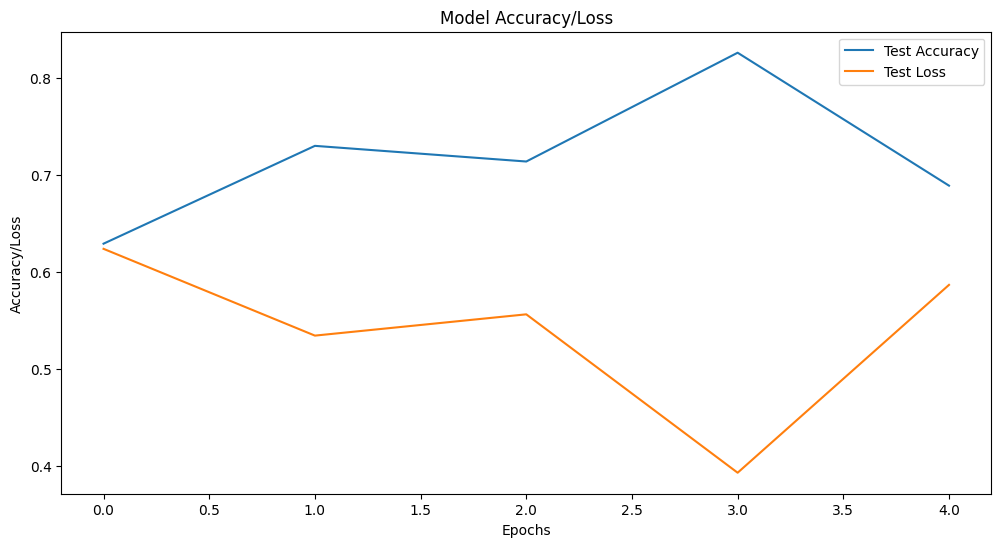

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(history.history["accuracy"],label="Test Accuracy")
plt.plot(history.history["loss"],label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy/Loss")
plt.title("Model Accuracy/Loss")
plt.legend()
plt.show()